Load libraries

In [45]:
import pandas as pd
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
import re
import warnings
warnings.filterwarnings('ignore')

Load URLs data

In [2]:
df = pd.read_csv('urldataset.csv')

In [3]:
df.head()

,url,result
0,https://sellait.site/id/app/user.php,1
1,https://solucioneskinesicas.com/Sella/app/user...,1
2,https://open-spotify.site/it/Autenticazione/ap...,1
3,https://sellabanca.site/Autenticazione/app/use...,1
4,https://1r5applmnt.com,1


In [4]:
df.shape

(740122, 2)

Extract Features

In [5]:
# Length of URL
df['url_length'] = df['url'].apply(lambda x: len(x))

# URL has http
df['url_has_http//'] = df['url'].apply(lambda x: 1 if 'http://' in x else 0)

# URL has https
df['url_has_https//'] = df['url'].apply(lambda x: 1 if 'https://' in x else 0)

# URL has num
df['url_contains_num'] = df['url'].apply(lambda url: 1 if re.search(r'\d', url) else 0)

# Number of dots
df['url_num_dots'] = df['url'].apply(lambda x: x.count('.'))

# Number of slashes
df['url_num_slashes'] = df['url'].apply(lambda x: x.count('/'))

# Number of Dash
df['number_of_dash'] = df['url'].apply(lambda x: x.count('-'))

# @ Symbol
df['has_at_symbol'] = df['url'].apply(lambda x: 1 if '@' in x else 0)

# Tilde Symbol
df['has_tilde_symbol'] = df['url'].apply(lambda x: 1 if '~' in x else 0)

# Number of Underscore
df['number_of_underscore'] = df['url'].apply(lambda x: x.count('_'))

# Number of NumPercent
df['number_of_numpercent'] = df['url'].apply(lambda x: x.count('%'))

# Number of Ampersand
df['number_of_ampersand'] = df['url'].apply(lambda x: x.count('&'))

# Number of Hash
df['number_of_hash'] = df['url'].apply(lambda x: x.count('#'))

# URL contains IP address
df['url_contains_ip'] = df['url'].apply(lambda url: 1 if re.search(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', url) else 0)


In [6]:
df.head()

,url,result,url_length,url_has_http//,url_has_https//,url_contains_num,url_num_dots,url_num_slashes,number_of_dash,has_at_symbol,has_tilde_symbol,number_of_underscore,number_of_numpercent,number_of_ampersand,number_of_hash,url_contains_ip
0,https://sellait.site/id/app/user.php,1,36,0,1,0,2,5,0,0,0,0,0,0,0,0
1,https://solucioneskinesicas.com/Sella/app/user...,1,50,0,1,0,2,5,0,0,0,0,0,0,0,0
2,https://open-spotify.site/it/Autenticazione/ap...,1,56,0,1,0,2,6,1,0,0,0,0,0,0,0
3,https://sellabanca.site/Autenticazione/app/use...,1,51,0,1,0,2,5,0,0,0,0,0,0,0,0
4,https://1r5applmnt.com,1,22,0,1,1,1,2,0,0,0,0,0,0,0,0


In [7]:
df.columns

Index(['url', 'result', 'url_length', 'url_has_http//', 'url_has_https//',
       'url_contains_num', 'url_num_dots', 'url_num_slashes', 'number_of_dash',
       'has_at_symbol', 'has_tilde_symbol', 'number_of_underscore',
       'number_of_numpercent', 'number_of_ampersand', 'number_of_hash',
       'url_contains_ip'],
      dtype='object')

In [8]:
df1 = df.drop(['url'], axis = 1)

In [9]:
df1.head()

,result,url_length,url_has_http//,url_has_https//,url_contains_num,url_num_dots,url_num_slashes,number_of_dash,has_at_symbol,has_tilde_symbol,number_of_underscore,number_of_numpercent,number_of_ampersand,number_of_hash,url_contains_ip
0,1,36,0,1,0,2,5,0,0,0,0,0,0,0,0
1,1,50,0,1,0,2,5,0,0,0,0,0,0,0,0
2,1,56,0,1,0,2,6,1,0,0,0,0,0,0,0
3,1,51,0,1,0,2,5,0,0,0,0,0,0,0,0
4,1,22,0,1,1,1,2,0,0,0,0,0,0,0,0


In [10]:
df1.shape

(740122, 15)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740122 entries, 0 to 740121
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   result                740122 non-null  int64
 1   url_length            740122 non-null  int64
 2   url_has_http//        740122 non-null  int64
 3   url_has_https//       740122 non-null  int64
 4   url_contains_num      740122 non-null  int64
 5   url_num_dots          740122 non-null  int64
 6   url_num_slashes       740122 non-null  int64
 7   number_of_dash        740122 non-null  int64
 8   has_at_symbol         740122 non-null  int64
 9   has_tilde_symbol      740122 non-null  int64
 10  number_of_underscore  740122 non-null  int64
 11  number_of_numpercent  740122 non-null  int64
 12  number_of_ampersand   740122 non-null  int64
 13  number_of_hash        740122 non-null  int64
 14  url_contains_ip       740122 non-null  int64
dtypes: int64(15)
memory usage: 84.7 MB

In [12]:
df1.columns

Index(['result', 'url_length', 'url_has_http//', 'url_has_https//',
       'url_contains_num', 'url_num_dots', 'url_num_slashes', 'number_of_dash',
       'has_at_symbol', 'has_tilde_symbol', 'number_of_underscore',
       'number_of_numpercent', 'number_of_ampersand', 'number_of_hash',
       'url_contains_ip'],
      dtype='object')

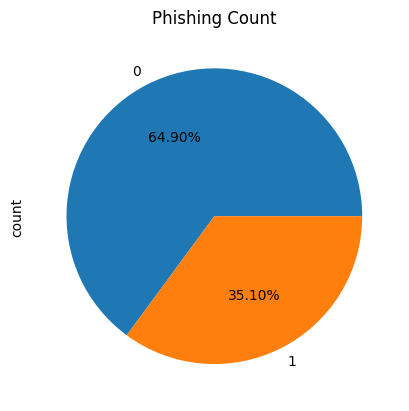

In [13]:
df1['result'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [14]:
#Independent Variables
X = df[['url_length', 'url_has_http//', 'url_has_https//', 'url_contains_num', 'url_num_dots', 'url_num_slashes', 'number_of_dash', 'has_at_symbol', 'has_tilde_symbol', 'number_of_underscore', 'number_of_numpercent', 'number_of_ampersand', 'number_of_hash', 'url_contains_ip']]

#Dependent Variable
y = df['result']

Train test split

In [15]:
from imblearn.over_sampling import SMOTE

X_sample, y_sample = SMOTE().fit_resample(X, y.values.ravel())

X_sample = pd.DataFrame(X_sample)
y_sample = pd.DataFrame(y_sample)

print("Size of X-sample :", X_sample.shape)
print("Size of y-sample :", y_sample.shape)

Size of X-sample : (960648, 14)
Size of y-sample : (960648, 1)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size = 0.2, random_state = 2529)
print("Shape of X_train: ", X_train.shape)
print("Shape of X_valid: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_valid: ", y_test.shape)

Shape of X_train:  (768518, 14)
Shape of X_valid:  (192130, 14)
Shape of y_train:  (768518, 1)
Shape of y_valid:  (192130, 1)


 XGBoost Classifier

In [17]:
#XGBoost Classifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train,y_train)

xg_predictions = xgb_model.predict(X_test)
accuracy_score(y_test,xg_predictions)


0.9297610992557123

In [18]:
cm = pd.DataFrame(confusion_matrix(y_test,xg_predictions))
cm.columns = ['Predicted 0', 'Predicted 1']
cm = cm.rename(index = {0:'Actual 0',1:'Actual 1'})
cm

,Predicted 0,Predicted 1
Actual 0,92693,3409
Actual 1,10086,85942


Random Forest

In [19]:
#Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)
accuracy_score(y_test, rfc_predictions)

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9322542028834643

In [20]:
cm = pd.DataFrame(confusion_matrix(y_test,rfc_predictions))
cm.columns = ['Predicted 0', 'Predicted 1']
cm = cm.rename(index = {0:'Actual 0',1:'Actual 1'})
cm

,Predicted 0,Predicted 1
Actual 0,92505,3597
Actual 1,9419,86609


Logistic Regression

In [21]:
#Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

log_predictions = log_model.predict(X_test)
accuracy_score(y_test,log_predictions)

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8504866496642898

In [22]:
cm_df = pd.DataFrame(confusion_matrix(y_test,log_predictions))
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index = {0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,90031,6071
Actual 1,22655,73373


K-Nearest Neighbors Classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
Knn=knn.fit(X_train,y_train)
k_predict=Knn.predict(X_test)
accuracy_score(y_test,k_predict)

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9179826159371259

In [24]:
confusion_matrix(y_test,k_predict)

array([[90122,  5980],
       [ 9778, 86250]], dtype=int64)

Naive Bayes Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
Nb=nb.fit(X_train,y_train)
n_predict=nb.predict(X_test)
accuracy_score(y_test,n_predict)

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8058085671160152

In [26]:
confusion_matrix(y_test,n_predict)

array([[95437,   665],
       [36645, 59383]], dtype=int64)

Decision Trees Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=30)
Dt=dt.fit(X_train, y_train)
d_predict=Dt.predict(X_test)
accuracy_score(y_test,d_predict)

0.9313173372195909

In [31]:
confusion_matrix(y_test,d_predict)

array([[92522,  3580],
       [ 9616, 86412]], dtype=int64)

Gradient Boosting Classifier

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)
Gbc=gbc.fit(X_train,y_train)
g_predict=Gbc.predict(X_test)
accuracy_score(y_test,g_predict)

C:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9284963306094831

In [33]:
confusion_matrix(y_test,g_predict)

array([[92638,  3464],
       [10274, 85754]], dtype=int64)

In [40]:
#Overall Accuracy table
import numpy as np
model = np.array(['XGBClassifier', 'Random Forest', 'Logistic Regression', 'K-Nearest Neighbors', 'Naive Bayes', 'Decision Trees', 'Gradient Boosting'])
scr = np.array([accuracy_score(y_test,xg_predictions)*100, accuracy_score(y_test, rfc_predictions)*100, accuracy_score(y_test,log_predictions)*100, accuracy_score(y_test,k_predict)*100, accuracy_score(y_test,n_predict)*100, accuracy_score(y_test,d_predict)*100, accuracy_score(y_test,g_predict)*100])
tbl = pd.DataFrame({"Model": model,"Accuracy Score": scr})
tbl

,Model,Accuracy Score
0,XGBClassifier,92.976110
1,Random Forest,93.225420
2,Logistic Regression,85.048665
3,K-Nearest Neighbors,91.798262
4,Naive Bayes,80.580857
5,Decision Trees,93.131734
6,Gradient Boosting,92.849633


In [ ]:
df1.shape

In [50]:
def predict_url(url):
  url_length = len(url)
  url_has_http = 1 if 'http://' in url else 0
  url_has_https = 1 if 'https://' in url else 0
  url_contains_num = 1 if re.search(r'\d', url) else 0
  url_num_dots = url.count('.')
  url_num_slashes = url.count('/')
  number_of_dash = url.count('_')
  has_at_symbol = 1 if '@' in url else 0
  has_tilde_symbol = 1 if '~' in url else 0
  number_of_underscore = url.count('_')
  number_of_numpercent = url.count('%')
  number_of_ampersand = url.count('&')
  number_of_hash = url.count('#')
  url_contains_ip = 1 if re.search(r'\b(?:[0-9]{1,3}\.){3}[0-9]{1,3}\b', url) else 0

  # Create a feature vector
  features = [url_length, url_has_http, url_has_https, url_contains_num, url_num_dots,
              url_num_slashes, number_of_dash, has_at_symbol, has_tilde_symbol,
              number_of_underscore, number_of_numpercent, number_of_ampersand,
              number_of_hash, url_contains_ip]

  # Convert the feature vector to a NumPy array
  features = np.array(features).reshape(1, -1)

  # Predict the URL
  # prediction = xgb_model.predict(features)[0]
  prediction = rfc.predict(features)[0]
  # prediction = log_model.predict(features)[0]
  # prediction = Knn.predict(features)[0]
  # prediction = nb.predict(features)[0]
  # prediction = Dt.predict(features)[0]
  # prediction = Gbc.predict(features)[0]



  return prediction

# Get the user input URL
print("Input Format: www.example.com")
url = input("Enter a URL: ")

# Predict the URL
prediction = predict_url(url)

# Print the prediction
if prediction == 1:
  print("The URL is malicious.")
else:
  print("The URL is legitimate.")


Input Format: www.example.com


Enter a URL:  dwd


The URL is malicious.
